In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
os.getcwd()
# Set path for new working directory
path = "C:/Users/Lee Kah Win/Desktop/Master DS Subjects/CDS503 - Machine Learning/Assignment 1/Assignment 1 Data"
os.chdir(path)

In [2]:
df_freq = pd.read_csv("Freq-PHO-Binary.csv")
df_norm = pd.read_csv("Norm-PHO-Binary.csv")
df_freq.info()
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            256 non-null    object 
 1   Emotion_Joy       256 non-null    int64  
 2   Emotion_Sadness   256 non-null    int64  
 3   Emotion_Anger     256 non-null    int64  
 4   Emotion_Disgust   256 non-null    int64  
 5   Emotion_Fear      256 non-null    int64  
 6   Emotion_Surprise  256 non-null    int64  
 7   Emotion_Contempt  256 non-null    int64  
 8   Emotion_Neutral   256 non-null    int64  
 9   Depression        256 non-null    object 
 10  Unnamed: 10       0 non-null      float64
dtypes: float64(1), int64(8), object(2)
memory usage: 22.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender           

In [3]:
df_freq = df_freq.drop(['Unnamed: 10'], axis=1)
df_freq.head()

,Gender,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Depression
0,Female,4,3,2,1,0,2,2,1,NO
1,Female,8,0,2,0,1,0,0,4,NO
2,Male,5,0,0,0,14,2,0,15,NO
3,Male,7,0,3,0,0,5,0,0,NO
4,Male,3,2,1,0,2,1,0,6,YES


In [4]:
df_norm.head()

,Gender,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Depression
0,Female,4.00,3.0,2.0,1.0,0.00,2.00,2.0,1.0,NO
1,Female,8.00,0.0,2.0,0.0,1.00,0.00,0.0,4.0,NO
2,Male,1.67,0.0,0.0,0.0,6.17,0.67,0.0,6.5,NO
3,Male,7.00,0.0,3.0,0.0,0.00,5.00,0.0,0.0,NO
4,Male,3.00,2.0,1.0,0.0,2.00,1.00,0.0,6.0,YES


In [5]:
print(df_norm['Depression'].value_counts())
print(df_freq['Depression'].value_counts())

NO     137
YES    119
Name: Depression, dtype: int64
NO     137
YES    119
Name: Depression, dtype: int64


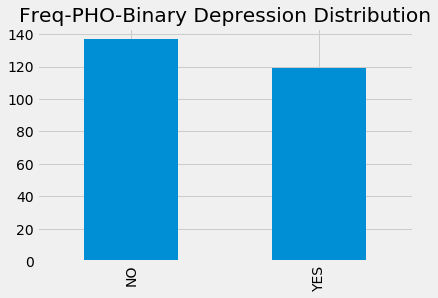

In [6]:
plt.style.use("fivethirtyeight")
df_freq.Depression.value_counts().plot(kind='bar', title='Freq-PHO-Binary Depression Distribution')

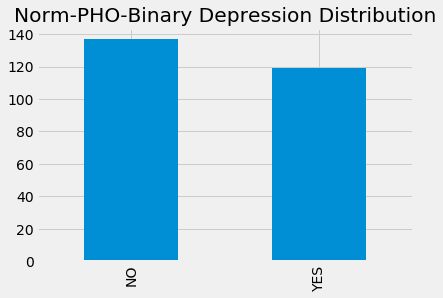

In [7]:
df_norm.Depression.value_counts().plot(kind='bar', title='Norm-PHO-Binary Depression Distribution')

# To report distribution for df_norm

<function matplotlib.pyplot.show(*args, **kw)>

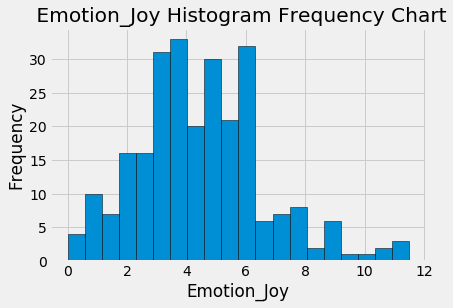

In [8]:
plt.style.use("fivethirtyeight")
x = df_norm['Emotion_Joy']
plt.hist(x, bins=20, edgecolor='black')
plt.xlabel("Emotion_Joy")
plt.ylabel('Frequency')
plt.title(f" Emotion_Joy Histogram Frequency Chart")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

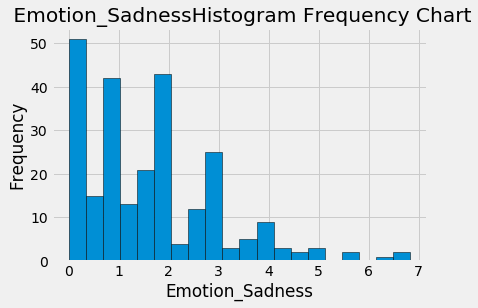

In [9]:
x = df_norm['Emotion_Sadness']
plt.hist(x, bins=20, edgecolor='black')
plt.xlabel("Emotion_Sadness")
plt.ylabel('Frequency')
plt.title(f" Emotion_SadnessHistogram Frequency Chart")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

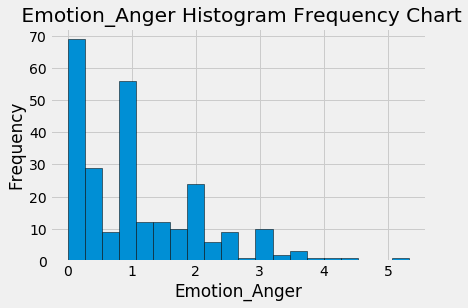

In [10]:
x = df_norm['Emotion_Anger']
plt.hist(x, bins=20, edgecolor='black')
plt.xlabel("Emotion_Anger")
plt.ylabel('Frequency')
plt.title(f" Emotion_Anger Histogram Frequency Chart")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

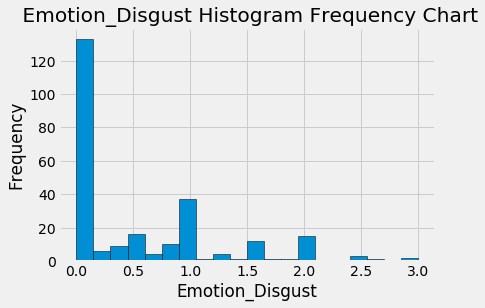

In [11]:
x = df_norm['Emotion_Disgust']
plt.hist(x, bins=20, edgecolor='black')
plt.xlabel("Emotion_Disgust")
plt.ylabel('Frequency')
plt.title(f" Emotion_Disgust Histogram Frequency Chart")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

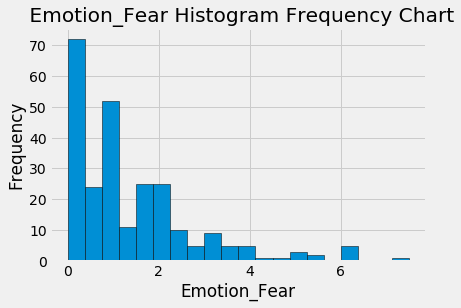

In [12]:
x = df_norm['Emotion_Fear']
plt.hist(x, bins=20, edgecolor='black')
plt.xlabel("Emotion_Fear")
plt.ylabel('Frequency')
plt.title(f" Emotion_Fear Histogram Frequency Chart")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

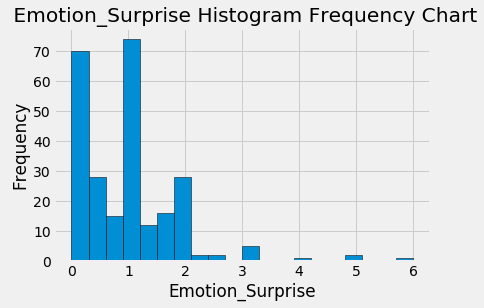

In [13]:
x = df_norm['Emotion_Surprise']
plt.hist(x, bins=20, edgecolor='black')
plt.xlabel("Emotion_Surprise")
plt.ylabel('Frequency')
plt.title(f" Emotion_Surprise Histogram Frequency Chart")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

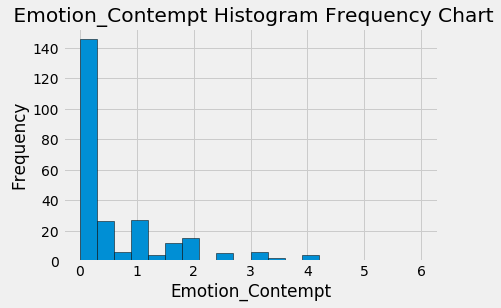

In [14]:
x = df_norm['Emotion_Contempt']
plt.hist(x, bins=20, edgecolor='black')
plt.xlabel("Emotion_Contempt")
plt.ylabel('Frequency')
plt.title(f" Emotion_Contempt Histogram Frequency Chart")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

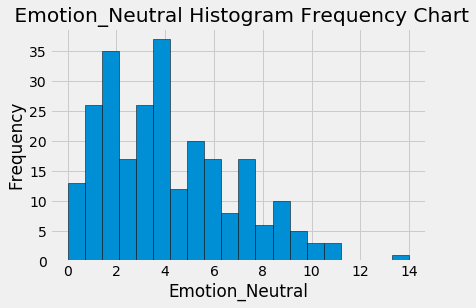

In [15]:
x = df_norm['Emotion_Neutral']
plt.hist(x, bins=20, edgecolor='black')
plt.xlabel("Emotion_Neutral")
plt.ylabel('Frequency')
plt.title(f" Emotion_Neutral Histogram Frequency Chart")
plt.show

# Preprocessing

## Preprocessing - Label Encoding

In [16]:
le = LabelEncoder()
df_norm.Gender = le.fit_transform(df_norm.Gender)
df_norm.Depression = le.fit_transform(df_norm.Depression)
df_freq.Gender = le.fit_transform(df_freq.Gender)
df_freq.Depression = le.fit_transform(df_freq.Depression)
df_norm.head()

,Gender,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Depression
0,0,4.00,3.0,2.0,1.0,0.00,2.00,2.0,1.0,0
1,0,8.00,0.0,2.0,0.0,1.00,0.00,0.0,4.0,0
2,1,1.67,0.0,0.0,0.0,6.17,0.67,0.0,6.5,0
3,1,7.00,0.0,3.0,0.0,0.00,5.00,0.0,0.0,0
4,1,3.00,2.0,1.0,0.0,2.00,1.00,0.0,6.0,1


## Preprocessing -  Balance Data by Random Over Sampling

In [17]:
count_freq_class_0, count_freq_class_1 = df_freq.Depression.value_counts()
count_norm_class_0, count_norm_class_1 = df_norm.Depression.value_counts()
df_freq_class_0 = df_freq[df_freq['Depression'] == 0]
df_freq_class_1 = df_freq[df_freq['Depression'] == 1]
df_norm_class_0 = df_norm[df_norm['Depression'] == 0]
df_norm_class_1 = df_norm[df_norm['Depression'] == 1]                                                            

In [18]:
print(df_freq_class_0.shape)
print(df_norm_class_0.shape)
print(df_freq_class_1.shape)
print(df_norm_class_1.shape)

(137, 10)
(137, 10)
(119, 10)
(119, 10)


In [19]:
df_freq_class_1_over = df_freq_class_1.sample(count_freq_class_0, replace=True)
df_norm_class_1_over = df_norm_class_1.sample(count_norm_class_0, replace=True)
print(df_freq_class_1_over.shape)
print(df_norm_class_1_over.shape)

(137, 10)
(137, 10)


In [20]:
df_freq = pd.concat([df_freq_class_0,df_freq_class_1_over],axis=0)
df_norm = pd.concat([df_norm_class_0,df_norm_class_1_over],axis=0)
print(df_freq.shape)
print(df_norm.shape)
print(df_freq.Depression.value_counts())
print(df_norm.Depression.value_counts())

(274, 10)
(274, 10)
1    137
0    137
Name: Depression, dtype: int64
1    137
0    137
Name: Depression, dtype: int64


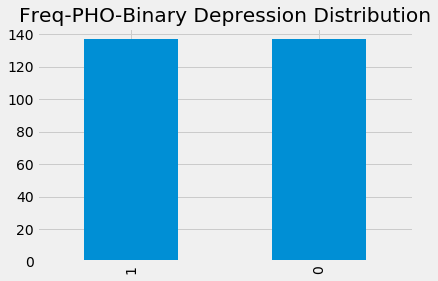

In [21]:
df_freq.Depression.value_counts().plot(kind='bar', title='Freq-PHO-Binary Depression Distribution')

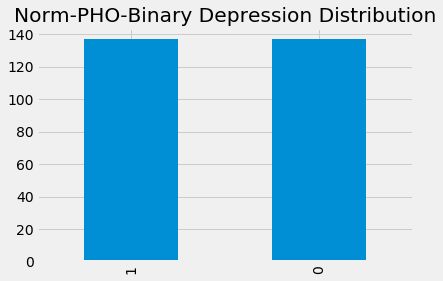

In [22]:
df_norm.Depression.value_counts().plot(kind='bar', title='Norm-PHO-Binary Depression Distribution')

## Preprocessing - One Hot Encoding

In [23]:
df_norm.head()

,Gender,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Depression
0,0,4.00,3.0,2.0,1.0,0.00,2.00,2.0,1.0,0
1,0,8.00,0.0,2.0,0.0,1.00,0.00,0.0,4.0,0
2,1,1.67,0.0,0.0,0.0,6.17,0.67,0.0,6.5,0
3,1,7.00,0.0,3.0,0.0,0.00,5.00,0.0,0.0,0
5,0,11.50,0.5,0.5,0.0,0.00,0.50,0.5,1.5,0


In [24]:
df_norm_enc = pd.get_dummies(df_norm, prefix = ['Gender'], columns = ['Gender'])
df_norm_enc.head()

,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Depression,Gender_0,Gender_1
0,4.00,3.0,2.0,1.0,0.00,2.00,2.0,1.0,0,1,0
1,8.00,0.0,2.0,0.0,1.00,0.00,0.0,4.0,0,1,0
2,1.67,0.0,0.0,0.0,6.17,0.67,0.0,6.5,0,0,1
3,7.00,0.0,3.0,0.0,0.00,5.00,0.0,0.0,0,0,1
5,11.50,0.5,0.5,0.0,0.00,0.50,0.5,1.5,0,1,0


In [25]:
df_freq_enc = pd.get_dummies(df_freq, prefix = ['Gender'], columns = ['Gender'])
df_freq_enc.head()

,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Depression,Gender_0,Gender_1
0,4,3,2,1,0,2,2,1,0,1,0
1,8,0,2,0,1,0,0,4,0,1,0
2,5,0,0,0,14,2,0,15,0,0,1
3,7,0,3,0,0,5,0,0,0,0,1
5,23,1,1,0,0,1,1,3,0,1,0


## Preprocessing - Separate Target and Features

In [26]:
features_freq = df_freq_enc.drop('Depression', axis=1)
target_freq = df_freq_enc.Depression
features_norm = df_norm_enc.drop('Depression', axis=1)
target_norm = df_norm_enc.Depression

## Preprocessing - Normalisation

In [27]:
from sklearn import preprocessing

df = preprocessing.normalize(features_freq)
names = features_freq.columns
features_freq = pd.DataFrame(df, columns=names)
features_freq.head()

,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Gender_0,Gender_1
0,0.632456,0.474342,0.316228,0.158114,0.000000,0.316228,0.316228,0.158114,0.158114,0.000000
1,0.862662,0.000000,0.215666,0.000000,0.107833,0.000000,0.000000,0.431331,0.107833,0.000000
2,0.235441,0.000000,0.000000,0.000000,0.659234,0.094176,0.000000,0.706322,0.000000,0.047088
3,0.763763,0.000000,0.327327,0.000000,0.000000,0.545545,0.000000,0.000000,0.000000,0.109109
4,0.987024,0.042914,0.042914,0.000000,0.000000,0.042914,0.042914,0.128742,0.042914,0.000000


In [28]:
d = preprocessing.normalize(features_norm)
names = features_norm.columns
features_norm = pd.DataFrame(d, columns=names)
features_norm.head()

,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Gender_0,Gender_1
0,0.632456,0.474342,0.316228,0.158114,0.000000,0.316228,0.316228,0.158114,0.158114,0.000000
1,0.862662,0.000000,0.215666,0.000000,0.107833,0.000000,0.000000,0.431331,0.107833,0.000000
2,0.181611,0.000000,0.000000,0.000000,0.670982,0.072862,0.000000,0.706870,0.000000,0.108749
3,0.763763,0.000000,0.327327,0.000000,0.000000,0.545545,0.000000,0.000000,0.000000,0.109109
4,0.984309,0.042796,0.042796,0.000000,0.000000,0.042796,0.042796,0.128388,0.085592,0.000000


# Modelling - Baseline

In [29]:
scoring = ['accuracy','precision_weighted', 'recall_weighted', 'f1_weighted']

In [30]:
dummy_clf = DummyClassifier(strategy="uniform")
for score_dummy in scoring:
    scoredummy = cross_val_score(dummy_clf, features_freq, target_freq, cv=5,scoring = score_dummy)
    print(f"Freq-PHO-Binary - Dummy - {str(score_dummy)} : {scoredummy.mean()}")

Freq-PHO-Binary - Dummy - accuracy : 0.5402693602693602
Freq-PHO-Binary - Dummy - precision_weighted : 0.4853531630334138
Freq-PHO-Binary - Dummy - recall_weighted : 0.5366329966329966
Freq-PHO-Binary - Dummy - f1_weighted : 0.4397991562381153


In [31]:
for score_dummy in scoring:
    scoredummy = cross_val_score(dummy_clf, features_norm, target_norm, cv=5,scoring = score_dummy)
    print(f"Norm-PHO-Binary - Dummy - {str(score_dummy)} : {scoredummy.mean()}")

Norm-PHO-Binary - Dummy - accuracy : 0.5180471380471381
Norm-PHO-Binary - Dummy - precision_weighted : 0.508158611873851
Norm-PHO-Binary - Dummy - recall_weighted : 0.5042424242424242
Norm-PHO-Binary - Dummy - f1_weighted : 0.4554367012298046


# Modelling - Support Vector Machine

In [32]:
models = [SVC(kernel='linear'), SVC(kernel='poly'), SVC(kernel='rbf'), SVC(kernel='sigmoid')]

In [33]:
for model in models:
    if model == models[0]:
        param_grid = {'C': [0.01,0.0125,0.02,0.03,0.04,0.05 ]}
    elif model == models[1]:
        param_grid = {'C': [0.01,0.1,1, 10, 25, 50,100, 1000,10000], 'degree': [2, 3, 4, 5], 'gamma': ['scale','auto']}
    elif model == models[2]:
        param_grid = {'C': [0.5,0.75,1, 1.25,1.5,1.75,2],'gamma': ['scale','auto'],'kernel': ['rbf']}
    else:
        param_grid = {'C': [0.1,0.125,0.2,0.3,0.4 ], 'gamma': ['scale','auto']}
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall_weighted', n_jobs=-1)
    grid_result = grid_search.fit(features_norm, target_norm)
    print(str(model), '-', grid_result.best_params_)
    print(grid_result.best_score_)
    print('')

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) - {'C': 0.05}
0.5222895622895622

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) - {'C': 100, 'degree': 5, 'gamma': 'scale'}
0.7265319865319866

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) - {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.6281481481481481

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    dec

In [34]:
for model in models:
    if model == models[0]:
        param_grid = {'C': [9000,10000,20000]}
    elif model == models[1]:
        param_grid = {'C': [75,78,80,82,85,90], 'degree': [ 5,6,7,8,9,10], 'gamma': ['scale','auto']}
    elif model == models[2]:
        param_grid = {'C': [950,975, 1000,1025,1050], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                      'gamma': ['scale','auto'],'kernel': ['rbf']}
    else:
        param_grid = {'C': [1200,1300,2000,3000], 'gamma': ['scale','auto']}
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall_weighted', n_jobs=-1)
    grid_result = grid_search.fit(features_freq, target_freq)
    print(str(model), '-', grid_result.best_params_)
    print(grid_result.best_score_)
    print('')

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) - {'C': 9000}
0.5837037037037037

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) - {'C': 78, 'degree': 5, 'gamma': 'scale'}
0.7010774410774411

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) - {'C': 1025, 'gamma': 'scale', 'kernel': 'rbf'}
0.6828956228956229

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    d

In [55]:
svc_freq=SVC(kernel='poly', C=78, degree = 5, gamma= 'scale')
accuracy = cross_val_score(svc_freq, features_freq, target_freq, cv=5,scoring = 'accuracy')
precision_weighted = cross_val_score(svc_freq, features_freq, target_freq, cv=5,scoring = 'precision_weighted')
recall_weighted = cross_val_score(svc_freq, features_freq, target_freq, cv=5,scoring = 'recall_weighted')
f1_weighted = cross_val_score(svc_freq, features_freq, target_freq,cv=5, scoring = 'f1_weighted')
print(f"Accuracy : {accuracy.mean()}")
print(f"Precision_weighted : {precision_weighted.mean()}")
print(f"Recall_weighted :{recall_weighted.mean()}")
print(f"f1_weighted :{f1_weighted.mean()}")

Accuracy : 0.7010774410774411
Precision_weighted : 0.7086670649367942
Recall_weighted :0.7010774410774411
f1_weighted :0.6981592374552903


In [54]:
svc_norm=SVC(kernel='poly', C= 100, degree= 5, gamma= 'scale')
accuracy = cross_val_score(svc_norm, features_norm, target_norm, cv=5,scoring = 'accuracy')
precision_weighted = cross_val_score(svc_norm, features_norm, target_norm, cv=5,scoring = 'precision_weighted')
recall_weighted = cross_val_score(svc_norm, features_norm, target_norm, cv=5,scoring = 'recall_weighted')
f1_weighted = cross_val_score(svc_norm, features_norm, target_norm,cv=5, scoring = 'f1_weighted')
print(f"Accuracy : {accuracy.mean()}")
print(f"Precision_weighted : {precision_weighted.mean()}")
print(f"Recall_weighted :{recall_weighted.mean()}")
print(f"f1_weighted :{f1_weighted.mean()}")


Accuracy : 0.7265319865319866
Precision_weighted : 0.737851996420637
Recall_weighted :0.7265319865319866
f1_weighted :0.7229098094285269


# Modelling - KNN

In [37]:
# instantiate model
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, features_freq, target_freq, cv=5, scoring='accuracy')
print('Accuracy (Validation) =', scores.mean())     

Accuracy (Validation) = 0.5731986531986533


In [61]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 30))
weight_options = ["uniform", "distance"]

In [62]:
# The param_grid specifies one grid should be explored
param_grid = dict(n_neighbors = k_range, weights = weight_options)                                            
# Fit on the dataset on all parameter combinations in param_grid
# Retain the best combination
grid_search_freq = GridSearchCV(knn, param_grid, cv = 5, scoring = 'recall_weighted')
grid_search_freq.fit(features_freq, target_freq)
print(grid_search_freq.best_params_)
print(grid_search_freq.best_score_)

{'n_neighbors': 18, 'weights': 'distance'}
0.7044444444444445


In [64]:
knn_freq = KNeighborsClassifier(n_neighbors=18, weights = 'distance')
for score_knn in scoring:
    scoreknn = cross_val_score(knn_freq, features_freq, target_freq, cv=5,scoring = score_knn)
    print(f"Freq-PHO-Binary - KNN - {str(score_knn)} : {scoreknn.mean()}")

Freq-PHO-Binary - KNN - accuracy : 0.7044444444444445
Freq-PHO-Binary - KNN - precision_weighted : 0.7263174563803855
Freq-PHO-Binary - KNN - recall_weighted : 0.7044444444444445
Freq-PHO-Binary - KNN - f1_weighted : 0.6966223177175644


In [65]:
grid_search_norm = GridSearchCV(knn, param_grid, cv = 5, scoring = 'recall_weighted')
grid_search_norm.fit(features_norm, target_norm)
print(grid_search_norm.best_params_)
print(grid_search_norm.best_score_)

{'n_neighbors': 1, 'weights': 'uniform'}
0.7410101010101011


In [66]:
knn_norm = KNeighborsClassifier(n_neighbors=1, weights = 'uniform')
for score_knn in scoring:
    scoreknn = cross_val_score(knn_norm, features_norm, target_norm, cv=5,scoring = score_knn)
    print(f"Norm-PHO-Binary - KNN - {str(score_knn)} : {scoreknn.mean()}")

Norm-PHO-Binary - KNN - accuracy : 0.7410101010101011
Norm-PHO-Binary - KNN - precision_weighted : 0.75185124433734
Norm-PHO-Binary - KNN - recall_weighted : 0.7410101010101011
Norm-PHO-Binary - KNN - f1_weighted : 0.7389967708522046


# Modelling - Decision Tree Classifier

In [43]:
dtc = DecisionTreeClassifier(min_samples_split=2, random_state=0)
# Define the parameter values that should be searched
sample_split_range = list(range(2, 10))
criterion_options = ['gini', 'entropy']
max_depth_options = list(range(2, 50))
num_leafs = [1, 5, 10, 20, 50]

In [44]:
param_grid = dict(min_samples_split=sample_split_range, 
                  criterion = criterion_options, max_depth = max_depth_options,
                 min_samples_leaf = num_leafs)
for score in scoring:
    grid_freq = GridSearchCV(dtc, param_grid, cv=5, scoring=score)
    grid_freq.fit(features_freq, target_freq)
    print("Freq-PHO-Binary")
    print(grid_freq.best_params_)
    print(str(score))
    print(grid_freq.best_score_)


Freq-PHO-Binary
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}
accuracy
0.678989898989899
Freq-PHO-Binary
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}
precision_weighted
0.6810156347205584
Freq-PHO-Binary
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}
recall_weighted
0.678989898989899
Freq-PHO-Binary
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}
f1_weighted
0.6762416356130003


In [58]:
# due to our selected criteria is recall, therefore the recall optimised parameter is used
dtc_freq = DecisionTreeClassifier(min_samples_split=2, criterion= 'gini', 
                                  max_depth= 11, min_samples_leaf= 1,random_state=0)
for score_dtc in scoring:
    scoredtc = cross_val_score(dtc_freq, features_freq, target_freq, cv=5,scoring = score_dtc)
    print(f"Freq-PHO-Binary - DTC - {str(score_dtc)} : {scoredtc.mean()}")

Freq-PHO-Binary - DTC - accuracy : 0.678989898989899
Freq-PHO-Binary - DTC - precision_weighted : 0.6810156347205584
Freq-PHO-Binary - DTC - recall_weighted : 0.678989898989899
Freq-PHO-Binary - DTC - f1_weighted : 0.6762416356130003


In [47]:
for score in scoring:
    grid_norm = GridSearchCV(dtc, param_grid, cv=5, scoring=score)
    grid_norm.fit(features_norm, target_norm)
    print("Norm-PHO-Binary")    
    print(grid_norm.best_params_)
    print(str(score))
    print(grid_norm.best_score_)

Norm-PHO-Binary
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2}
accuracy
0.7521212121212122
Norm-PHO-Binary
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2}
precision_weighted
0.7595577739075219
Norm-PHO-Binary
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2}
recall_weighted
0.7521212121212122
Norm-PHO-Binary
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2}
f1_weighted
0.750195063706399


In [59]:
dtc_norm = DecisionTreeClassifier(min_samples_split=2, criterion= 'entropy', 
                                  max_depth= 6, min_samples_leaf= 10,random_state=0)
for score_dtc in scoring:
    scoredtc = cross_val_score(dtc_norm, features_norm, target_norm, cv=5,scoring = score_dtc)
    print(f"Norm-PHO-Binary - DTC - {str(score_dtc)} : {scoredtc.mean()}")

Norm-PHO-Binary - DTC - accuracy : 0.7521212121212122
Norm-PHO-Binary - DTC - precision_weighted : 0.7595577739075219
Norm-PHO-Binary - DTC - recall_weighted : 0.7521212121212122
Norm-PHO-Binary - DTC - f1_weighted : 0.750195063706399


# Modelling - RandomForestClassifier

In [49]:
rfc=RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc_freq = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring = 'recall_weighted')
CV_rfc_freq.fit(features_freq, target_freq)
CV_rfc_freq.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [50]:
CV_rfc_freq=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 200, 
                                   max_depth=8, criterion='gini')
for score_rfc in scoring:
    scorerfc = cross_val_score(CV_rfc_freq, features_freq, target_freq, cv=5,scoring = score_rfc)
    print(f"Freq-PHO-Binary - RFC - {str(score_rfc)} : {scorerfc.mean()}")

Freq-PHO-Binary - RFC - accuracy : 0.6899663299663299
Freq-PHO-Binary - RFC - precision_weighted : 0.6960918240598992
Freq-PHO-Binary - RFC - recall_weighted : 0.6899663299663299
Freq-PHO-Binary - RFC - f1_weighted : 0.6873727361274458


In [51]:
CV_rfc_norm = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring = 'recall_weighted')
CV_rfc_norm.fit(features_norm, target_norm)
CV_rfc_norm.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [60]:
CV_rfc_norm=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 500, 
                                   max_depth=8, criterion='entropy')
for score_rfc in scoring:
    scorerfc = cross_val_score(CV_rfc_norm, features_norm, target_norm, cv=5,scoring = score_rfc)
    print(f"Norm-PHO-Binary - RFC - {str(score_rfc)} : {scorerfc.mean()}")

Norm-PHO-Binary - RFC - accuracy : 0.7626936026936025
Norm-PHO-Binary - RFC - precision_weighted : 0.7768103275642819
Norm-PHO-Binary - RFC - recall_weighted : 0.7626936026936025
Norm-PHO-Binary - RFC - f1_weighted : 0.758955455141478


# Save the best performing model

In [67]:
# Import pickle
import pickle
# Specify the file name to save the model
# Use filename='freq_model.sav' for Freq-PHO-Binary
# Use filename='norm_model.sav' for Norm-PHO-Binary
filename='norm_model.sav'
# Open the file name in write mode. Pass the filename and model.
# Replace modelname with the name of your model
pickle.dump(CV_rfc_norm, open(filename, 'wb'))